# Detect and Recognize Face v3 (DeepFace)
- Detect via HAAR Cascade
- Recognize via DeepFace- Detect via HAAR Cascade
- Recognize via DeepFace  
source: 
- https://pypi.org/project/deepface/https://pypi.org/project/deepface/
- https://sefiks.com/2020/05/25/large-scale-face-recognition-for-deep-learning/https://sefiks.com/2020/05/25/large-scale-face-recognition-for-deep-learning/


In [1]:
import cv2, math, json
import matplotlib.pyplot as plt
import sys,os

from deepface import DeepFace 
import pandas as pd
import numpy as np

%matplotlib inline

## definitions

In [2]:


def capture_from_camera(path_save='camera_snap01.jpg', device=0):
    camera = cv2.VideoCapture(device)
    return_value, img = camera.read()
    cv2.imwrite(path_save,img)
    del(camera)
    return img, path_save

def load_from_path(path_dir_file='dataset/5celebrities/val'):
    dic_item={}
    
    listDir= [ d for d in os.listdir(path_dir_file) if d if not d.startswith('.') ]
    for d in listDir:
        path_sub_dir=os.path.join (path_dir_file,d)
        dic_item[d]=  os.listdir(path_sub_dir)
        dd=[]
        for f in dic_item[d]:
            dd.append(os.path.join(path_sub_dir,f))
        dic_item[d]=dd
    
    return dic_item

def apply_embeding(p_dic):
   
    for d in p_dic:
        files=p_dic[d]
        encodedList=[]
        for f in files:
            if not os.path.basename(f).startswith('.'):
                embeddings = DeepFace.represent(img_path = f, model_name = 'Facenet512',enforce_detection=False)
                encodedList.append ([f,embeddings])
        p_dic[d]=encodedList
        
    return p_dic

## parameters
- boxed_face --mode train --path_dir_train dataset/5celebrities/train
- boxed_face --mode recognize --image_path dataset/5celebrities/val/madonna/madonna00005.jpg
- boxed_face --mode recognize --image_path camera

In [5]:
mode_process='recognize' #'recognize'

path_pre_computed_embeddings='pre_computed.json'
path_dir_train='dataset/5celebrities/train'
path_dir_train='dataset/5celebrities/val'



pic_mode='file'
tmpFile='tmp.jpg'

if pic_mode=='file':
    image_path='dataset/5celebrities/val/ben_afflek/ben_afflek00003.jpg'
    img = cv2.imread(image_path)
    cv2.imwrite(tmpFile,img)
elif pic_mode=='camera':
    camera = cv2.VideoCapture(0)
    return_value, img = camera.read()
    cv2.imwrite(tmpFile,img)
    del(camera)



# main

detecting and recognizing...
1/1 [==============================] - 0s 100ms/step
[{"index":0,"name":"ben_afflek","score":0.0026209285},{"index":0,"name":"ben_afflek","score":0.4920928374},{"index":0,"name":"ben_afflek","score":0.5143364507}]


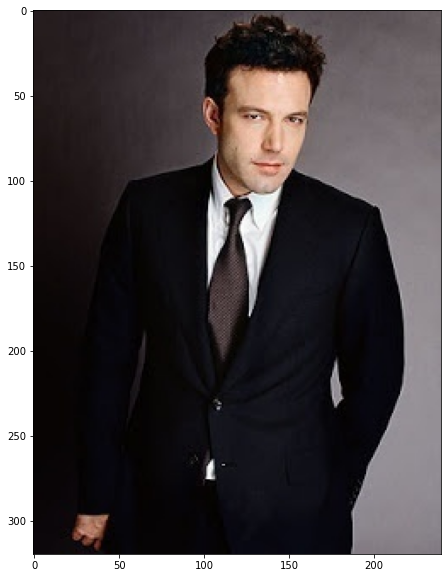

In [11]:
if mode_process=='train':
    print ('train...')
    dic_loaded_files = load_from_path(path_dir_file=path_dir_train)
    dic_pre_computed_embedings = apply_embeding(dic_loaded_files)
    
    with open('data_deepface.json', 'w') as f:
        json.dump(dic_pre_computed_embedings, f)

elif mode_process=='recognize':
    print ('detecting and recognizing...')
    with open('data_deepface.json', 'r') as f:
        dic_pre_computed_embedings=json.load(f)
    cv2.imwrite(tmpFile,img)
    img = cv2.imread(tmpFile)
    plt.figure(figsize=(10,10))
    plt.imshow(img[:,:,::-1])
    embeddings = DeepFace.represent(img_path = tmpFile, model_name = 'Facenet512',enforce_detection=False)

    
    
    df_score = pd.DataFrame(columns=['name','score'])
    for name in dic_pre_computed_embedings:
        aa=dic_pre_computed_embedings[name]
        for inst in range (len(aa)):
            pre_computed=aa[inst][1]
            score=DeepFace.dst.findCosineDistance(embeddings, pre_computed)
            df_score_row = pd.DataFrame([[name,score]], columns=['name','score'])
            df_score=pd.concat([ df_score,df_score_row])
            df_final=df_score.sort_values('score').head(3)
    print (df_final.reset_index().to_json(orient='records'))
    